In [353]:
import pandas as pd
import numpy as np

In [354]:
standard = pd.read_csv('/Users/elliottlevy/Downloads/standard.csv')
shooting = pd.read_csv('/Users/elliottlevy/Downloads/shooting.csv')
passing = pd.read_csv('/Users/elliottlevy/Downloads/passing.csv')
passingtypes = pd.read_csv('/Users/elliottlevy/Downloads/passingtypes.csv')
playingtime = pd.read_csv('/Users/elliottlevy/Downloads/playingtime.csv')
goalandshotcreation = pd.read_csv('/Users/elliottlevy/Downloads/goalandshotcreation.csv')
defensive = pd.read_csv('/Users/elliottlevy/Downloads/defensive.csv')
possession = pd.read_csv('/Users/elliottlevy/Downloads/possession.csv')
misc = pd.read_csv('/Users/elliottlevy/Downloads/misc.csv')

In [355]:
standard.columns = standard.iloc[0]
standard = standard.drop(0)

shooting.columns = shooting.iloc[0]
shooting = shooting.drop(0)

passing.columns = passing.iloc[0]
passing = passing.drop(0)

passingtypes.columns = passingtypes.iloc[0]
passingtypes = passingtypes.drop(0)

playingtime.columns = playingtime.iloc[0]
playingtime = playingtime.drop(0)

goalandshotcreation.columns = goalandshotcreation.iloc[0]
goalandshotcreation = goalandshotcreation.drop(0)

defensive.columns = defensive.iloc[0]
defensive = defensive.drop(0)

possession.columns = possession.iloc[0]
possession = possession.drop(0)

misc.columns = misc.iloc[0]
misc = misc.drop(0)

standard = standard.drop_duplicates()
shooting = shooting.drop_duplicates()
passing = passing.drop_duplicates()
passingtypes = passingtypes.drop_duplicates()
playingtime = playingtime.drop_duplicates()
goalandshotcreation = goalandshotcreation.drop_duplicates()
defensive = defensive.drop_duplicates()
possession = possession.drop_duplicates()
misc = misc.drop_duplicates()

In [356]:
standard.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA',
       'xG', 'xA', 'xG+xA', 'npxG', 'npxG+xA', 'Matches'],
      dtype='object', name=0)

In [357]:
shooting.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object', name=0)

In [358]:
set(standard['Pos'])

{'DF', 'DFFW', 'DFMF', 'FW', 'FWDF', 'FWMF', 'GK', 'MF', 'MFDF', 'MFFW'}

In [359]:
standard_wg = standard[standard['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
shooting_wg = shooting[shooting['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
passing_wg = passing[passing['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
passing_wg = passing[passing['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
passingtypes_wg = passingtypes[passingtypes['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
playingtime_wg = playingtime[playingtime['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
goalandshotcreation_wg = goalandshotcreation[goalandshotcreation['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
defensive_wg = defensive[defensive['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
possession_wg = possession[possession['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]
misc_wg = misc[misc['Pos'].isin(['DFFW','FW','FWDF','FWMF','MF','MFFW'])]

In [360]:
goose = standard_wg.iloc[:,[1,3,4,7,8,9,10,11,12,13,14,15,26]]
goose

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,npxG+xA
1,Paxten Aaronson\4cd41883,MFFW,Philadelphia,14,5,598,6.6,0.45,0,0.45,0,0,0.41
4,Ramón Ábila\db5ee72d,FW,D.C. United,12,0,225,2.5,1.2,0,1.2,0,0,0.4
5,Ramón Ábila\db5ee72d,FW,Minnesota Utd,10,1,268,3,0.67,0,0.67,0,0.33,0.87
7,Nicolás Acevedo\6140be7b,MF,NYCFC,24,15,1351,15,0,0,0,0,0,0.09
8,Ifunanyachi Achara\d31bf83e,FWMF,Toronto FC,14,10,821,9.1,0.22,0.11,0.22,0,0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Gyasi Zardes\09ae7f92,FW,Columbus Crew,21,18,1558,17.3,0.52,0,0.52,0,0,0.46
736,Gedion Zelalem\b15ac68f,MF,NYCFC,7,1,102,1.1,0,0,0,0,0,0
737,Lucas Zelarayán\3ce30893,MF,Columbus Crew,32,28,2622,29.1,0.41,0.14,0.38,0.03,0.03,0.38
739,Rida Zouhir\e1e65f24,MF,CF Montréal,2,0,17,0.2,0,0,0,0,0,0


In [361]:
list(shooting.columns).index('npxG/Sh')

22

In [362]:
goose['npxG/Sh'] = shooting_wg.iloc[:,22]


<ipython-input-362-128840be4bc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['npxG/Sh'] = shooting_wg.iloc[:,22]


In [363]:
goose['npxG/Sh'].fillna(0, inplace=True)
goose

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,npxG+xA,npxG/Sh
1,Paxten Aaronson\4cd41883,MFFW,Philadelphia,14,5,598,6.6,0.45,0,0.45,0,0,0.41,0.12
4,Ramón Ábila\db5ee72d,FW,D.C. United,12,0,225,2.5,1.2,0,1.2,0,0,0.4,0.1
5,Ramón Ábila\db5ee72d,FW,Minnesota Utd,10,1,268,3,0.67,0,0.67,0,0.33,0.87,0.14
7,Nicolás Acevedo\6140be7b,MF,NYCFC,24,15,1351,15,0,0,0,0,0,0.09,0.04
8,Ifunanyachi Achara\d31bf83e,FWMF,Toronto FC,14,10,821,9.1,0.22,0.11,0.22,0,0,0.45,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Gyasi Zardes\09ae7f92,FW,Columbus Crew,21,18,1558,17.3,0.52,0,0.52,0,0,0.46,0.19
736,Gedion Zelalem\b15ac68f,MF,NYCFC,7,1,102,1.1,0,0,0,0,0,0,0
737,Lucas Zelarayán\3ce30893,MF,Columbus Crew,32,28,2622,29.1,0.41,0.14,0.38,0.03,0.03,0.38,0.06
739,Rida Zouhir\e1e65f24,MF,CF Montréal,2,0,17,0.2,0,0,0,0,0,0,0


In [364]:
passing.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Cmp',
       'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp', 'Att', 'Cmp%', 'Cmp', 'Att',
       'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Ast', 'xA', 'A-xA', 'KP', '3-Jan', 'PPA',
       'CrsPA', 'Prog', 'Matches'],
      dtype='object', name=0)

In [365]:
goose['KP'] = passing_wg.iloc[:,25]
goose['Passes Final 1/3'] = passing_wg.iloc[:,26]
goose['PPA'] = passing_wg.iloc[:,27]
goose['CrsPA'] = passing_wg.iloc[:,28]
goose['Prog Passes'] = passing_wg.iloc[:,29]
goose

<ipython-input-365-98c663b1c157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['KP'] = passing_wg.iloc[:,25]
<ipython-input-365-98c663b1c157>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['Passes Final 1/3'] = passing_wg.iloc[:,26]
<ipython-input-365-98c663b1c157>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,npxG+xA,npxG/Sh,KP,Passes Final 1/3,PPA,CrsPA,Prog Passes
1,Paxten Aaronson\4cd41883,MFFW,Philadelphia,14,5,598,6.6,0.45,0,0.45,0,0,0.41,0.12,1.52,1.52,1.21,0,2.58
4,Ramón Ábila\db5ee72d,FW,D.C. United,12,0,225,2.5,1.2,0,1.2,0,0,0.4,0.1,0,0,1.6,0,1.6
5,Ramón Ábila\db5ee72d,FW,Minnesota Utd,10,1,268,3,0.67,0,0.67,0,0.33,0.87,0.14,2.67,0.67,1,0,2
7,Nicolás Acevedo\6140be7b,MF,NYCFC,24,15,1351,15,0,0,0,0,0,0.09,0.04,0.73,5.4,0.87,0,5.93
8,Ifunanyachi Achara\d31bf83e,FWMF,Toronto FC,14,10,821,9.1,0.22,0.11,0.22,0,0,0.45,0.17,0.55,0.66,0.66,0.11,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Gyasi Zardes\09ae7f92,FW,Columbus Crew,21,18,1558,17.3,0.52,0,0.52,0,0,0.46,0.19,0.69,1.1,0.23,0,1.1
736,Gedion Zelalem\b15ac68f,MF,NYCFC,7,1,102,1.1,0,0,0,0,0,0,0,0.91,11.8,1.82,0,11.8
737,Lucas Zelarayán\3ce30893,MF,Columbus Crew,32,28,2622,29.1,0.41,0.14,0.38,0.03,0.03,0.38,0.06,2.68,4.19,1.99,0.41,4.81
739,Rida Zouhir\e1e65f24,MF,CF Montréal,2,0,17,0.2,0,0,0,0,0,0,0,0,0,0,0,0


In [366]:
goalandshotcreation.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'SCA',
       'SCA90', 'PassLive', 'PassDead', 'Drib', 'Sh', 'Fld', 'Def', 'GCA',
       'GCA90', 'PassLive', 'PassDead', 'Drib', 'Sh', 'Fld', 'Def', 'Matches'],
      dtype='object', name=0)

In [367]:
goose['SCA'] = goalandshotcreation_wg.iloc[:,8]
goose['SCA_op'] = goalandshotcreation_wg.iloc[:,10]
goose['SCA_sp'] = goalandshotcreation_wg.iloc[:,11]
goose['SCA_dribble'] = goalandshotcreation_wg.iloc[:,12]
goose['SCA_defensive'] = goalandshotcreation_wg.iloc[:,15]
goose

<ipython-input-367-7b5e938d700c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['SCA'] = goalandshotcreation_wg.iloc[:,8]
<ipython-input-367-7b5e938d700c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['SCA_op'] = goalandshotcreation_wg.iloc[:,10]
<ipython-input-367-7b5e938d700c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G-PK,...,KP,Passes Final 1/3,PPA,CrsPA,Prog Passes,SCA,SCA_op,SCA_sp,SCA_dribble,SCA_defensive
1,Paxten Aaronson\4cd41883,MFFW,Philadelphia,14,5,598,6.6,0.45,0,0.45,...,1.52,1.52,1.21,0,2.58,2.27,1.97,0.15,0,0.15
4,Ramón Ábila\db5ee72d,FW,D.C. United,12,0,225,2.5,1.2,0,1.2,...,0,0,1.6,0,1.6,3.2,0.8,0,1.6,0
5,Ramón Ábila\db5ee72d,FW,Minnesota Utd,10,1,268,3,0.67,0,0.67,...,2.67,0.67,1,0,2,5.67,4,0,0.33,0
7,Nicolás Acevedo\6140be7b,MF,NYCFC,24,15,1351,15,0,0,0,...,0.73,5.4,0.87,0,5.93,1.93,1.73,0,0,0.13
8,Ifunanyachi Achara\d31bf83e,FWMF,Toronto FC,14,10,821,9.1,0.22,0.11,0.22,...,0.55,0.66,0.66,0.11,1.21,2.09,1.32,0,0.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Gyasi Zardes\09ae7f92,FW,Columbus Crew,21,18,1558,17.3,0.52,0,0.52,...,0.69,1.1,0.23,0,1.1,1.79,1.39,0,0.06,0
736,Gedion Zelalem\b15ac68f,MF,NYCFC,7,1,102,1.1,0,0,0,...,0.91,11.8,1.82,0,11.8,3.64,3.64,0,0,0
737,Lucas Zelarayán\3ce30893,MF,Columbus Crew,32,28,2622,29.1,0.41,0.14,0.38,...,2.68,4.19,1.99,0.41,4.81,4.95,2.41,1.48,0.45,0.03
739,Rida Zouhir\e1e65f24,MF,CF Montréal,2,0,17,0.2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
goose['Pressures'] = defensive_wg.iloc[:,17]
goose['Pressure %'] = defensive_wg.iloc[:,19]
goose['Tkl+Int'] = defensive_wg.iloc[:,28]
goose

<ipython-input-368-851686ed7fc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['Pressures'] = defensive_wg.iloc[:,17]
<ipython-input-368-851686ed7fc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['Pressure %'] = defensive_wg.iloc[:,19]
<ipython-input-368-851686ed7fc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G-PK,...,CrsPA,Prog Passes,SCA,SCA_op,SCA_sp,SCA_dribble,SCA_defensive,Pressures,Pressure %,Tkl+Int
1,Paxten Aaronson\4cd41883,MFFW,Philadelphia,14,5,598,6.6,0.45,0,0.45,...,0,2.58,2.27,1.97,0.15,0,0.15,26.8,33.3,3.48
4,Ramón Ábila\db5ee72d,FW,D.C. United,12,0,225,2.5,1.2,0,1.2,...,0,1.6,3.2,0.8,0,1.6,0,8.4,33.3,0.4
5,Ramón Ábila\db5ee72d,FW,Minnesota Utd,10,1,268,3,0.67,0,0.67,...,0,2,5.67,4,0,0.33,0,10.3,16.1,0
7,Nicolás Acevedo\6140be7b,MF,NYCFC,24,15,1351,15,0,0,0,...,0,5.93,1.93,1.73,0,0,0.13,21.7,30.2,4.73
8,Ifunanyachi Achara\d31bf83e,FWMF,Toronto FC,14,10,821,9.1,0.22,0.11,0.22,...,0.11,1.21,2.09,1.32,0,0.55,0,19.2,18.3,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Gyasi Zardes\09ae7f92,FW,Columbus Crew,21,18,1558,17.3,0.52,0,0.52,...,0,1.1,1.79,1.39,0,0.06,0,16.5,27.3,0.64
736,Gedion Zelalem\b15ac68f,MF,NYCFC,7,1,102,1.1,0,0,0,...,0,11.8,3.64,3.64,0,0,0,13.6,26.7,6.36
737,Lucas Zelarayán\3ce30893,MF,Columbus Crew,32,28,2622,29.1,0.41,0.14,0.38,...,0.41,4.81,4.95,2.41,1.48,0.45,0.03,17.4,26.5,1.89
739,Rida Zouhir\e1e65f24,MF,CF Montréal,2,0,17,0.2,0,0,0,...,0,0,0,0,0,0,0,25,0,5


In [369]:
goose['Successful Dribbles'] = possession_wg.iloc[:,15]
goose['Successful Dribble %'] = possession_wg.iloc[:,17]
goose['Nutmegs'] = possession_wg.iloc[:,19]
goose['Carries'] = possession_wg.iloc[:,20]
goose['Progressive Carries'] = possession_wg.iloc[:,23]
goose['Carries Final 1/3'] = possession_wg.iloc[:,24]
goose['Miscontrols'] = possession_wg.iloc[:,26]
goose['Dispossessed'] = possession_wg.iloc[:,27]
goose

<ipython-input-369-2317dc0f5b52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['Successful Dribbles'] = possession_wg.iloc[:,15]
<ipython-input-369-2317dc0f5b52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goose['Successful Dribble %'] = possession_wg.iloc[:,17]
<ipython-input-369-2317dc0f5b52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G-PK,...,Pressure %,Tkl+Int,Successful Dribbles,Successful Dribble %,Nutmegs,Carries,Progressive Carries,Carries Final 1/3,Miscontrols,Dispossessed
1,Paxten Aaronson\4cd41883,MFFW,Philadelphia,14,5,598,6.6,0.45,0,0.45,...,33.3,3.48,1.36,37.5,0.3,31.4,4.09,0.91,1.36,1.67
4,Ramón Ábila\db5ee72d,FW,D.C. United,12,0,225,2.5,1.2,0,1.2,...,33.3,0.4,2.4,60,0,19.6,2.4,0,2.4,1.6
5,Ramón Ábila\db5ee72d,FW,Minnesota Utd,10,1,268,3,0.67,0,0.67,...,16.1,0,1,37.5,0.33,21.3,6,2,1.33,2.33
7,Nicolás Acevedo\6140be7b,MF,NYCFC,24,15,1351,15,0,0,0,...,30.2,4.73,0.87,72.2,0,44.1,4.33,1.4,0.6,0.6
8,Ifunanyachi Achara\d31bf83e,FWMF,Toronto FC,14,10,821,9.1,0.22,0.11,0.22,...,18.3,2.53,1.65,51.7,0,26.2,2.75,1.1,2.31,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Gyasi Zardes\09ae7f92,FW,Columbus Crew,21,18,1558,17.3,0.52,0,0.52,...,27.3,0.64,0.52,47.4,0.06,18.2,1.5,0.35,2.37,1.85
736,Gedion Zelalem\b15ac68f,MF,NYCFC,7,1,102,1.1,0,0,0,...,26.7,6.36,2.73,100,0,78.2,8.18,3.64,1.82,0.91
737,Lucas Zelarayán\3ce30893,MF,Columbus Crew,32,28,2622,29.1,0.41,0.14,0.38,...,26.5,1.89,2.96,58.5,0.27,46.1,6.19,2.44,3.33,3.33
739,Rida Zouhir\e1e65f24,MF,CF Montréal,2,0,17,0.2,0,0,0,...,0,5,0,0,0,25,0,0,0,0


In [370]:
goose['Player'] = [x[0] for x in [x.split('\\') for x in goose['Player']]]

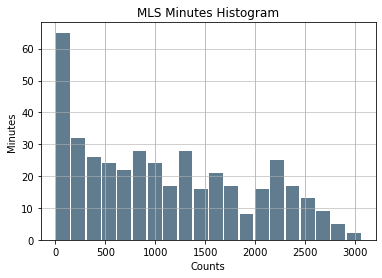

In [371]:
import matplotlib.pyplot as plt

pd.Series([int(x) for x in goose['Min']]).plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('MLS Minutes Histogram')
plt.xlabel('Counts')
plt.ylabel('Minutes')
plt.grid(axis='y', alpha=0.75)

In [372]:
pd.Series([int(x) for x in goose['Min']]).describe()

count     415.000000
mean     1109.368675
std       833.273958
min         1.000000
25%       362.000000
50%       971.000000
75%      1734.000000
max      3060.000000
dtype: float64

In [373]:
goose[['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast',
       'G-PK', 'PK', 'PKatt', 'npxG+xA', 'npxG/Sh', 'KP', 'Passes Final 1/3', 'PPA',
       'CrsPA', 'Prog Passes', 'SCA', 'SCA_op', 'SCA_sp', 'SCA_dribble',
       'SCA_defensive', 'Pressures', 'Pressure %', 'Tkl+Int',
       'Successful Dribbles', 'Successful Dribble %', 'Nutmegs', 'Carries',
       'Progressive Carries', 'Carries Final 1/3', 'Miscontrols',
       'Dispossessed']] = goose[['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast',
       'G-PK', 'PK', 'PKatt', 'npxG+xA', 'npxG/Sh', 'KP', 'Passes Final 1/3', 'PPA',
       'CrsPA', 'Prog Passes', 'SCA', 'SCA_op', 'SCA_sp', 'SCA_dribble',
       'SCA_defensive', 'Pressures', 'Pressure %', 'Tkl+Int',
       'Successful Dribbles', 'Successful Dribble %', 'Nutmegs', 'Carries',
       'Progressive Carries', 'Carries Final 1/3', 'Miscontrols',
       'Dispossessed']].apply(pd.to_numeric)
goose

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G-PK,...,Pressure %,Tkl+Int,Successful Dribbles,Successful Dribble %,Nutmegs,Carries,Progressive Carries,Carries Final 1/3,Miscontrols,Dispossessed
1,Paxten Aaronson,MFFW,Philadelphia,14,5,598,6.6,0.45,0.00,0.45,...,33.3,3.48,1.36,37.5,0.30,31.4,4.09,0.91,1.36,1.67
4,Ramón Ábila,FW,D.C. United,12,0,225,2.5,1.20,0.00,1.20,...,33.3,0.40,2.40,60.0,0.00,19.6,2.40,0.00,2.40,1.60
5,Ramón Ábila,FW,Minnesota Utd,10,1,268,3.0,0.67,0.00,0.67,...,16.1,0.00,1.00,37.5,0.33,21.3,6.00,2.00,1.33,2.33
7,Nicolás Acevedo,MF,NYCFC,24,15,1351,15.0,0.00,0.00,0.00,...,30.2,4.73,0.87,72.2,0.00,44.1,4.33,1.40,0.60,0.60
8,Ifunanyachi Achara,FWMF,Toronto FC,14,10,821,9.1,0.22,0.11,0.22,...,18.3,2.53,1.65,51.7,0.00,26.2,2.75,1.10,2.31,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Gyasi Zardes,FW,Columbus Crew,21,18,1558,17.3,0.52,0.00,0.52,...,27.3,0.64,0.52,47.4,0.06,18.2,1.50,0.35,2.37,1.85
736,Gedion Zelalem,MF,NYCFC,7,1,102,1.1,0.00,0.00,0.00,...,26.7,6.36,2.73,100.0,0.00,78.2,8.18,3.64,1.82,0.91
737,Lucas Zelarayán,MF,Columbus Crew,32,28,2622,29.1,0.41,0.14,0.38,...,26.5,1.89,2.96,58.5,0.27,46.1,6.19,2.44,3.33,3.33
739,Rida Zouhir,MF,CF Montréal,2,0,17,0.2,0.00,0.00,0.00,...,0.0,5.00,0.00,0.0,0.00,25.0,0.00,0.00,0.00,0.00


In [374]:
goose_75min = goose[goose['Min'] >= 1734]
goose_75min

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G-PK,...,Pressure %,Tkl+Int,Successful Dribbles,Successful Dribble %,Nutmegs,Carries,Progressive Carries,Carries Final 1/3,Miscontrols,Dispossessed
12,Luciano Acosta,MF,FC Cincinnati,31,30,2694,29.9,0.23,0.27,0.23,...,24.9,2.81,2.88,56.6,0.33,53.3,9.13,2.74,3.08,2.51
37,José Andrés Martínez,MF,Philadelphia,24,23,1953,21.7,0.00,0.09,0.00,...,36.9,6.22,1.71,68.5,0.18,49.5,4.19,1.06,0.83,1.61
48,Dairon Asprilla,FWMF,Portland Timbers,34,25,2088,23.2,0.43,0.13,0.39,...,23.6,2.46,1.81,50.6,0.04,34.3,5.78,1.72,3.75,2.46
52,Eduard Atuesta,MF,Los Angeles FC,24,24,2128,23.6,0.08,0.30,0.04,...,32.1,4.15,1.86,64.7,0.21,59.2,7.08,2.20,1.36,2.20
66,Ezequiel Barco,FWMF,Atlanta Utd,25,23,2136,23.7,0.30,0.25,0.25,...,18.6,1.22,2.45,72.5,0.13,47.0,10.00,4.85,1.90,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Rémi Walter,MF,Sporting KC,28,23,1894,21.0,0.05,0.05,0.05,...,30.1,3.52,0.76,72.7,0.05,41.3,3.52,1.05,0.86,0.81
709,Victor Wanyama,MF,CF Montréal,27,27,2361,26.2,0.08,0.00,0.04,...,30.6,3.17,1.64,78.2,0.04,49.9,4.66,1.56,0.95,1.15
715,Brian White,FW,Vancouver,27,23,1915,21.3,0.56,0.23,0.56,...,22.6,0.85,0.33,31.8,0.00,16.8,1.13,0.23,2.91,1.74
732,Jackson Yueill,MF,San Jose,29,28,2557,28.4,0.11,0.00,0.11,...,32.4,3.13,0.81,62.2,0.11,42.3,2.92,0.85,0.63,1.09


In [375]:
goose.quantile(.90)

0
MP                        32.000
Starts                    27.000
Min                     2318.200
90s                       25.760
Gls                        0.480
Ast                        0.296
G-PK                       0.440
PK                         0.040
PKatt                      0.040
npxG+xA                    0.596
npxG/Sh                    0.160
KP                         2.406
Passes Final 1/3           5.420
PPA                        1.830
CrsPA                      0.460
Prog Passes                5.602
SCA                        4.410
SCA_op                     2.966
SCA_sp                     0.742
SCA_dribble                0.442
SCA_defensive              0.190
Pressures                 27.820
Pressure %                33.300
Tkl+Int                    5.140
Successful Dribbles        2.236
Successful Dribble %      78.210
Nutmegs                    0.270
Carries                   49.960
Progressive Carries        7.226
Carries Final 1/3          2.642
Miscontr

In [376]:
player_count = []

for i in list(goose.columns)[7:]:
    print(i)
    print(list(goose_75min['Player'].loc[(goose[i] >= goose[i].quantile(.90))]))
    for j in list(goose_75min['Player'].loc[(goose[i] >= goose[i].quantile(.90))]):
        player_count.append(j)

Gls
['Gustavo Bou', 'Adam Buksa', 'Valentín Castellanos', 'Javier Eduardo López', 'Ola Kamara', 'Damir Kreilach', 'Felipe Mora', 'Hany Mukhtar', 'Nani', 'Ricardo Pepi', 'Raúl Ruidíaz', 'Johnny Russell', 'Dániel Sallói', 'C.J. Sapong', 'Brian White']
Ast
['Eduard Atuesta', 'Gustavo Bou', 'Cristian Espinoza', 'Jesus Ferreira', 'Carles Gil', 'Djordje Mihailovic', 'Maximiliano Moralez', 'Hany Mukhtar', 'Nani', 'Jack Price', 'Yeferson Soteldo']
G-PK
['Gustavo Bou', 'Adam Buksa', 'Valentín Castellanos', 'Javier Eduardo López', 'Ola Kamara', 'Damir Kreilach', 'Robin Lod', 'Felipe Mora', 'Hany Mukhtar', 'Ricardo Pepi', 'Raúl Ruidíaz', 'Johnny Russell', 'Dániel Sallói', 'C.J. Sapong', 'Brian White']
PK
['Dairon Asprilla', 'Eduard Atuesta', 'Ezequiel Barco', 'Cole Bassett', 'Gustavo Bou', 'Brenner', 'Valentín Castellanos', 'Cristián Dajome', 'Marky Delgado', 'Cecilio Domínguez', 'Javier Eduardo López', 'Carles Gil', 'Gonzalo Higuaín', 'Ola Kamara', 'Gadi Kinda', 'Patryk Klimala', 'Felipe Mora', 

In [377]:
players, frequencies = np.unique(player_count, return_counts = True)
players, frequencies

(array(['Adam Buksa', 'Albert Rusnák', 'Alexander Ring', 'Benji Michel',
        'Brenner', 'Brian White', 'C.J. Sapong', 'Carles Gil',
        'Cecilio Domínguez', 'Cole Bassett', 'Cristian Cásseres Jr.',
        'Cristian Espinoza', 'Cristián Dajome', 'Dairon Asprilla',
        'Damir Kreilach', 'Darlington Nagbe', 'Deiber Caicedo',
        'Derrick Etienne', 'Diego Chará', 'Djordje Mihailovic',
        'Dániel Sallói', 'Eduard Atuesta', 'Emanuel Reynoso',
        'Eric Remedi', 'Ezequiel Barco', 'Fafà Picault', 'Felipe Mora',
        'Fábio', 'Gadi Kinda', 'Gastón Giménez', 'Gonzalo Higuaín',
        'Gregore', 'Gustavo Bou', 'Hany Mukhtar', 'Jack Price',
        'Jackson Yueill', 'Jamiro Monteiro', 'Javier Eduardo López',
        'Jesus Ferreira', 'Jesús Medina', 'Johnny Russell',
        'Jonathan dos Santos', 'José Andrés Martínez', 'José Cifuentes',
        'João Paulo Mior', 'Junior Moreno', 'Kacper Przybyłko',
        'Keaton Parks', 'Kevin Cabral', 'Khiry Shelton', 'Leon Flac

In [378]:
players1 = list(players)
frequencies1 = list(frequencies)

In [379]:
wellrounded_df = pd.DataFrame({'player':players1, 'frequency':frequencies1})
wellrounded_df

,player,frequency
0,Adam Buksa,3
1,Albert Rusnák,5
2,Alexander Ring,3
3,Benji Michel,1
4,Brenner,2
...,...,...
76,Wil Trapp,2
77,Yeferson Soteldo,9
78,Yimmi Chará,2
79,Yuya Kubo,1


In [380]:
wellrounded_df = wellrounded_df.sort_values(by=['frequency'], ascending = False)
wellrounded_df

,player,frequency
22,Emanuel Reynoso,18
7,Carles Gil,18
53,Luciano Acosta,12
58,Maximiliano Moralez,10
54,Marcelino Moreno,9
...,...,...
15,Darlington Nagbe,1
50,Leon Flach,1
48,Kevin Cabral,1
47,Keaton Parks,1


In [391]:
wellrounded_df.head(25)

,player,frequency
22,Emanuel Reynoso,18
7,Carles Gil,18
53,Luciano Acosta,12
58,Maximiliano Moralez,10
54,Marcelino Moreno,9
60,Nani,9
77,Yeferson Soteldo,9
24,Ezequiel Barco,9
32,Gustavo Bou,9
52,Lucas Zelarayán,8


In [382]:
print('Areas of Strength')
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Carles Gil'] >= goose[i].quantile(.90)))[0] == True:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Carles Gil'] >= goose[i].quantile(.90)))[0] == False:
        print(i)

print('----------------')
print('Areas of Weakness')           
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Carles Gil'] >= goose[i].quantile(.90)))[0] == False:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Carles Gil'] >= goose[i].quantile(.90)))[0] == True:
        print(i)

Areas of Strength
Ast
PK
PKatt
npxG+xA
KP
Passes Final 1/3
PPA
CrsPA
Prog Passes
SCA
SCA_op
SCA_sp
SCA_dribble
Successful Dribbles
Nutmegs
Carries
Progressive Carries
Miscontrols
----------------
Areas of Weakness
Gls
G-PK
npxG/Sh
SCA_defensive
Pressures
Pressure %
Tkl+Int
Successful Dribble %


In [383]:
list(goose['Gls'].loc[goose['Player'] == 'Carles Gil'] >= goose[i].quantile(.90))

[False]

In [384]:
list(goose.columns[7:])

['Gls',
 'Ast',
 'G-PK',
 'PK',
 'PKatt',
 'npxG+xA',
 'npxG/Sh',
 'KP',
 'Passes Final 1/3',
 'PPA',
 'CrsPA',
 'Prog Passes',
 'SCA',
 'SCA_op',
 'SCA_sp',
 'SCA_dribble',
 'SCA_defensive',
 'Pressures',
 'Pressure %',
 'Tkl+Int',
 'Successful Dribbles',
 'Successful Dribble %',
 'Nutmegs',
 'Carries',
 'Progressive Carries',
 'Carries Final 1/3',
 'Miscontrols',
 'Dispossessed']

In [385]:
print('Areas of Strength')
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Emanuel Reynoso'] >= goose[i].quantile(.90)))[0] == True:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Emanuel Reynoso'] >= goose[i].quantile(.90)))[0] == False:
        print(i)

print('----------------')
print('Areas of Weakness')           
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Emanuel Reynoso'] >= goose[i].quantile(.90)))[0] == False:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Emanuel Reynoso'] >= goose[i].quantile(.90)))[0] == True:
        print(i)

Areas of Strength
PK
PKatt
KP
Passes Final 1/3
PPA
CrsPA
Prog Passes
SCA
SCA_op
SCA_sp
SCA_dribble
Successful Dribbles
Nutmegs
Carries
Progressive Carries
----------------
Areas of Weakness
Gls
Ast
G-PK
npxG+xA
npxG/Sh
SCA_defensive
Pressures
Pressure %
Tkl+Int
Successful Dribble %
Miscontrols


In [395]:
print('Areas of Strength')
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Mauricio Pereyra'] >= goose[i].quantile(.90)))[0] == True:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Mauricio Pereyra'] >= goose[i].quantile(.90)))[0] == False:
        print(i)

print('----------------')
print('Areas of Weakness')           
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Mauricio Pereyra'] >= goose[i].quantile(.90)))[0] == False:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Mauricio Pereyra'] >= goose[i].quantile(.90)))[0] == True:
        print(i)

Areas of Strength
PKatt
KP
Passes Final 1/3
PPA
Prog Passes
SCA_sp
Miscontrols
----------------
Areas of Weakness
Gls
Ast
G-PK
PK
npxG+xA
npxG/Sh
CrsPA
SCA
SCA_op
SCA_dribble
SCA_defensive
Pressures
Pressure %
Tkl+Int
Successful Dribbles
Successful Dribble %
Nutmegs
Carries
Progressive Carries


In [387]:
print('Areas of Strength')
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Tony Rocha'] >= goose[i].quantile(.90)))[0] == True:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Tony Rocha'] >= goose[i].quantile(.90)))[0] == False:
        print(i)

print('----------------')
print('Areas of Weakness')           
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Tony Rocha'] >= goose[i].quantile(.90)))[0] == False:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Tony Rocha'] >= goose[i].quantile(.90)))[0] == True:
        print(i)

Areas of Strength
npxG+xA
npxG/Sh
KP
Passes Final 1/3
Prog Passes
SCA
SCA_op
Pressures
Tkl+Int
Successful Dribbles
Successful Dribble %
Carries
Miscontrols
----------------
Areas of Weakness
Gls
Ast
G-PK
PK
PKatt
PPA
CrsPA
SCA_sp
SCA_dribble
SCA_defensive
Pressure %
Nutmegs
Progressive Carries


In [388]:
print('Areas of Strength')
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Justin McMaster'] >= goose[i].quantile(.90)))[0] == True:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Justin McMaster'] >= goose[i].quantile(.90)))[0] == False:
        print(i)

print('----------------')
print('Areas of Weakness')           
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Justin McMaster'] >= goose[i].quantile(.90)))[0] == False:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Justin McMaster'] >= goose[i].quantile(.90)))[0] == True:
        print(i)

Areas of Strength
Ast
npxG+xA
KP
CrsPA
SCA
SCA_op
SCA_defensive
Pressure %
Carries
Progressive Carries
Miscontrols
----------------
Areas of Weakness
Gls
G-PK
PK
PKatt
npxG/Sh
Passes Final 1/3
PPA
Prog Passes
SCA_sp
SCA_dribble
Pressures
Tkl+Int
Successful Dribbles
Successful Dribble %
Nutmegs


In [390]:
print('Areas of Strength')
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Albert Rusnák'] >= goose[i].quantile(.90)))[0] == True:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Albert Rusnák'] >= goose[i].quantile(.90)))[0] == False:
        print(i)

print('----------------')
print('Areas of Weakness')           
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Albert Rusnák'] >= goose[i].quantile(.90)))[0] == False:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Albert Rusnák'] >= goose[i].quantile(.90)))[0] == True:
        print(i)

Areas of Strength
PK
PKatt
KP
SCA
SCA_sp
Miscontrols
----------------
Areas of Weakness
Gls
Ast
G-PK
npxG+xA
npxG/Sh
Passes Final 1/3
PPA
CrsPA
Prog Passes
SCA_op
SCA_dribble
SCA_defensive
Pressures
Pressure %
Tkl+Int
Successful Dribbles
Successful Dribble %
Nutmegs
Carries
Progressive Carries


In [392]:
print('Areas of Strength')
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Robin Lod'] >= goose[i].quantile(.90)))[0] == True:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Robin Lod'] >= goose[i].quantile(.90)))[0] == False:
        print(i)

print('----------------')
print('Areas of Weakness')           
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Robin Lod'] >= goose[i].quantile(.90)))[0] == False:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Robin Lod'] >= goose[i].quantile(.90)))[0] == True:
        print(i)

Areas of Strength
G-PK
npxG+xA
SCA_dribble
Nutmegs
Miscontrols
----------------
Areas of Weakness
Gls
Ast
PK
PKatt
npxG/Sh
KP
Passes Final 1/3
PPA
CrsPA
Prog Passes
SCA
SCA_op
SCA_sp
SCA_defensive
Pressures
Pressure %
Tkl+Int
Successful Dribbles
Successful Dribble %
Carries
Progressive Carries


In [393]:
print('Areas of Strength')
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Samuel Grandsir'] >= goose[i].quantile(.90)))[0] == True:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Samuel Grandsir'] >= goose[i].quantile(.90)))[0] == False:
        print(i)

print('----------------')
print('Areas of Weakness')           
for i in list(goose.columns[7:32]):
    if list((goose[i].loc[goose['Player'] == 'Samuel Grandsir'] >= goose[i].quantile(.90)))[0] == False:
        print(i)
for i in list(goose.columns[33:34]):
    if list((goose[i].loc[goose['Player'] == 'Samuel Grandsir'] >= goose[i].quantile(.90)))[0] == True:
        print(i)

Areas of Strength
CrsPA
Successful Dribbles
Nutmegs
Progressive Carries
Miscontrols
----------------
Areas of Weakness
Gls
Ast
G-PK
PK
PKatt
npxG+xA
npxG/Sh
KP
Passes Final 1/3
PPA
Prog Passes
SCA
SCA_op
SCA_sp
SCA_dribble
SCA_defensive
Pressures
Pressure %
Tkl+Int
Successful Dribble %
Carries
